In [166]:
import pandas as pd
import zipfile
from pathlib import Path

home = Path.home()

# The path to your zip file
filename = "BTCUSDT-1h-2023-08"
zip_filepath = f'{home}/crypto_data/binance/data/spot/monthly/klines/BTCUSDT/1h/{filename}.zip'
csv_filename = f'{filename}.csv'
columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_volume", "taker_buy_quote_volume", "ignore"]

with zipfile.ZipFile(zip_filepath, 'r') as z:
    # Use pandas to read the CSV file directly from the zip file
    with z.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file, header=None, names=columns)

df.head()


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1690848000000,29232.26,29288.20,29210.99,29283.96,720.85463,1690851599999,2.107947e+07,17954,341.10168,9.975408e+06,0
1,1690851600000,29283.96,29347.16,29169.37,29200.54,973.96678,1690855199999,2.850160e+07,26866,457.28798,1.338138e+07,0
2,1690855200000,29200.53,29218.74,28720.00,28933.22,5165.01282,1690858799999,1.495571e+08,88074,2152.09462,6.230125e+07,0
3,1690858800000,28933.22,28951.12,28813.86,28835.00,1813.18905,1690862399999,5.238132e+07,37227,797.90100,2.305322e+07,0
4,1690862400000,28835.01,28928.34,28803.50,28866.00,1752.08768,1690865999999,5.056954e+07,31403,832.45833,2.402522e+07,0


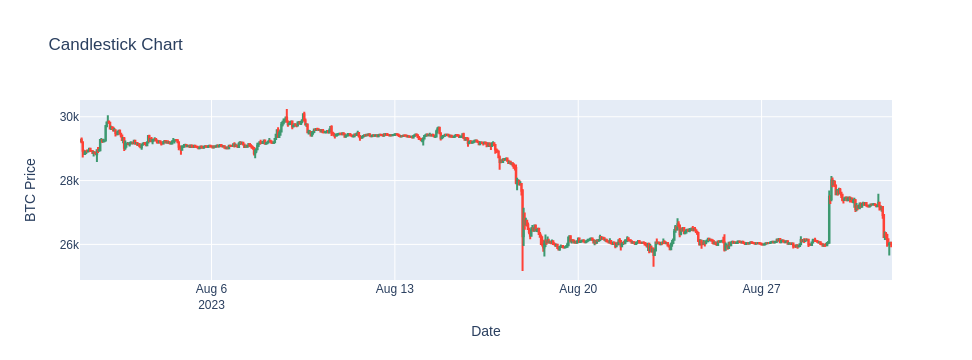

In [167]:
import pandas as pd
import plotly.graph_objects as go

df['date'] = pd.to_datetime(df['open_time'], unit='ms')

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='BTC Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [176]:
df
df[(df['open_time'] >= 1690851600000) & (df['close_time'] < 1690869600000)]

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,date
1,1690851600000,29283.96,29347.16,29169.37,29200.54,973.96678,1690855199999,2.850160e+07,26866,457.28798,1.338138e+07,0,2023-08-01 01:00:00
2,1690855200000,29200.53,29218.74,28720.00,28933.22,5165.01282,1690858799999,1.495571e+08,88074,2152.09462,6.230125e+07,0,2023-08-01 02:00:00
3,1690858800000,28933.22,28951.12,28813.86,28835.00,1813.18905,1690862399999,5.238132e+07,37227,797.90100,2.305322e+07,0,2023-08-01 03:00:00
4,1690862400000,28835.01,28928.34,28803.50,28866.00,1752.08768,1690865999999,5.056954e+07,31403,832.45833,2.402522e+07,0,2023-08-01 04:00:00
5,1690866000000,28866.00,28922.70,28852.00,28920.03,777.69583,1690869599999,2.247003e+07,19383,386.29878,1.116157e+07,0,2023-08-01 05:00:00


# Dollar Cost Averaging Method
- Initial Asset is 1,000,000 USDT
## Benchmark 3 strategies
- Invest 3,000 USDT at every 0:00, named A
- Invest 3,000 USDT at every 12:00, named B
- All in the beginning, named C

In [157]:
# Portfolio list
portfolios = []

In [158]:
# Invest 3,000 USDT at every 0:00
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].hour == 0:
        btc_price = row['open']
        amount = 3000 / btc_price
        usdt -= 3000
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.head()


,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
0,997000,0.102626,1.000000e+06,1.000006e+06,1.000006e+06,1.000005e+06,1690848000000
1,997000,0.102626,1.000005e+06,1.000012e+06,1.000012e+06,9.999967e+05,1690851600000
2,997000,0.102626,9.999967e+05,9.999986e+05,9.999986e+05,9.999693e+05,1690855200000
3,997000,0.102626,9.999693e+05,9.999711e+05,9.999711e+05,9.999592e+05,1690858800000
4,997000,0.102626,9.999592e+05,9.999688e+05,9.999688e+05,9.999624e+05,1690862400000


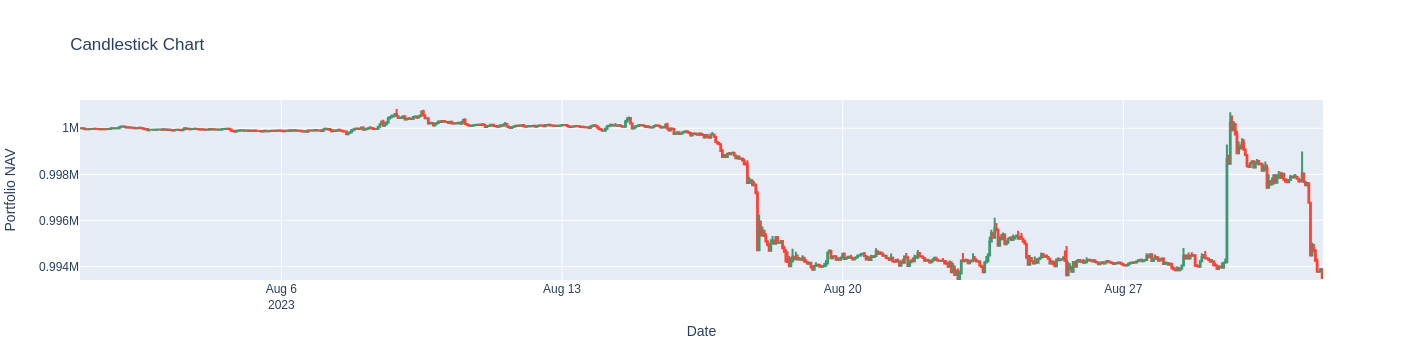

In [159]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [160]:
# Invest 3,000 USDT at every 12:00
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].hour == 12:
        btc_price = row['open']
        amount = 3000 / btc_price
        usdt -= 3000
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.head()

,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
0,1000000,0.0,1000000.0,1000000.0,1000000.0,1000000.0,1690848000000
1,1000000,0.0,1000000.0,1000000.0,1000000.0,1000000.0,1690851600000
2,1000000,0.0,1000000.0,1000000.0,1000000.0,1000000.0,1690855200000
3,1000000,0.0,1000000.0,1000000.0,1000000.0,1000000.0,1690858800000
4,1000000,0.0,1000000.0,1000000.0,1000000.0,1000000.0,1690862400000


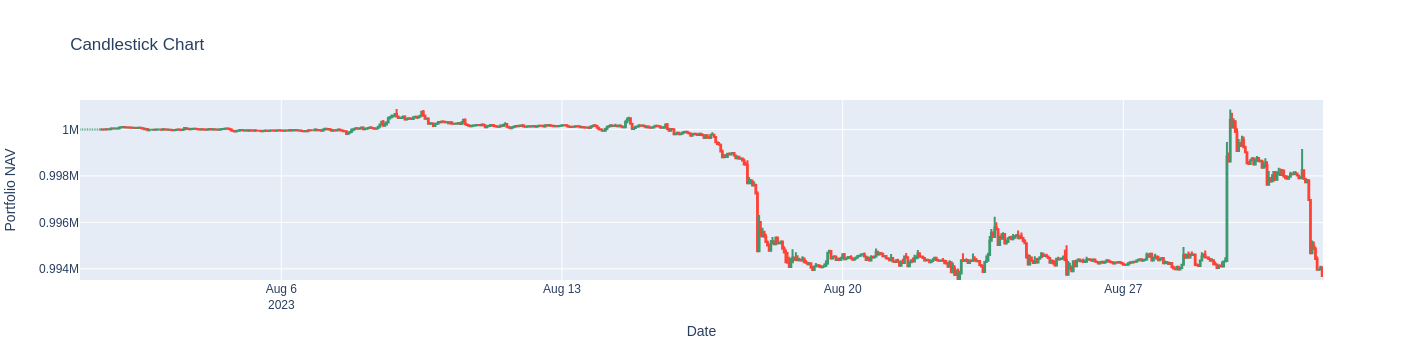

In [161]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [162]:
# All in 
usdt = 1000000
btc = 0
asset = {
    "USDT": [],
    "BTC": [],
    "nav_open": [],
    "nav_high": [],
    "nav_low": [],
    "nav_close": []
}
for index, row in df.iterrows():
    if row['date'].day == 1:
        btc_price = row['open']
        amount = usdt / btc_price
        usdt -= usdt
        btc += amount
    asset["USDT"].append(usdt)
    asset["BTC"].append(btc)
    asset["nav_open"].append(btc * row["open"] + usdt)
    asset["nav_high"].append(btc * row["high"] + usdt)
    asset["nav_low"].append(btc * row["high"] + usdt)
    asset["nav_close"].append(btc * row["close"] + usdt)
portfolio = pd.DataFrame(asset)
portfolio["open_time"] = df["open_time"]
portfolios.append(portfolio.copy())
portfolio.head()

,USDT,BTC,nav_open,nav_high,nav_low,nav_close,open_time
0,0,34.208782,1.000000e+06,1.001914e+06,1.001914e+06,1.001769e+06,1690848000000
1,0,34.208782,1.001769e+06,1.003931e+06,1.003931e+06,9.989149e+05,1690851600000
2,0,34.208782,9.989146e+05,9.995375e+05,9.995375e+05,9.897702e+05,1690855200000
3,0,34.208782,9.897702e+05,9.903825e+05,9.903825e+05,9.864102e+05,1690858800000
4,0,34.208782,9.864106e+05,9.896033e+05,9.896033e+05,9.874707e+05,1690862400000


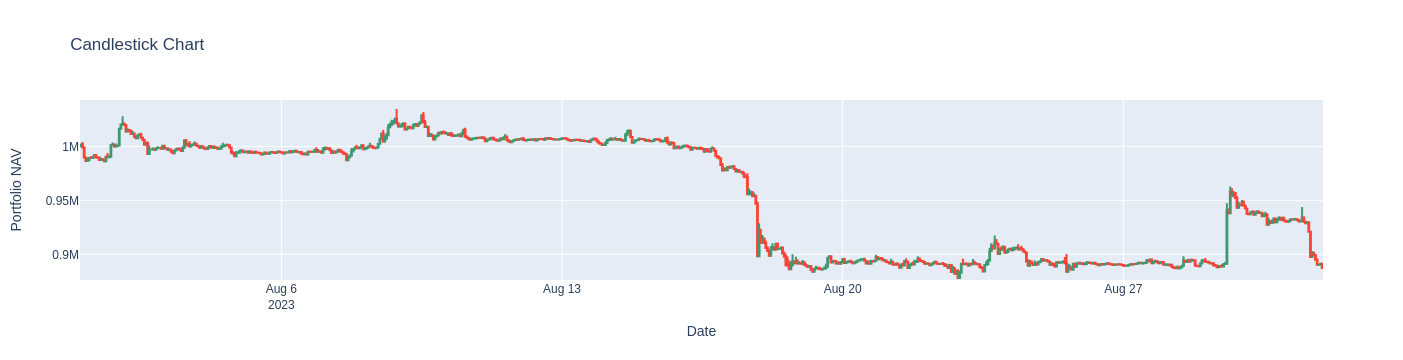

In [163]:
import pandas as pd
import plotly.graph_objects as go

# Create a Candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=portfolio['nav_open'],
                high=portfolio['nav_high'],
                low=portfolio['nav_low'],
                close=portfolio['nav_close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Portfolio NAV',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Hides the range slider
)

# Show the figure
fig.show()

In [164]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np


now = datetime.now()
next_month = now + relativedelta(months=1)
duration_seconds = (next_month - now).total_seconds()
MONTH_IN_MS = duration_seconds * 1000

def monthly_return(df: pd.DataFrame, ts_col: str, nav_col: str):
    r = (df[nav_col][len(df) - 1] - df[nav_col][0]) / df[nav_col][0]
    span = df[ts_col][len(df) - 1] - df[ts_col][0]
    r = r * MONTH_IN_MS / span
    return r

def monthly_volatility(df: pd.DataFrame, ts_col: str, nav_col: str):
    df = df.copy()
    r = monthly_return(df, ts_col, nav_col)
    
    df["log_return"] = np.log(df[nav_col] / df[nav_col].shift(1))
    df['diff'] = df[ts_col].diff()
    df = df.dropna()
    r = np.sum(df['log_return'] * df['diff']) / np.sum(df['diff'])
    df['diff_sq'] = np.power(df["diff"], 2)
    var = (np.power(df["log_return"] - r, 2) * df['diff_sq']).sum() / df['diff_sq'].sum()
    volatility = np.sqrt(var)
    interval = df['diff'].mean()
    volatility = volatility * np.sqrt(MONTH_IN_MS / interval)
    return volatility

def monthly_mdd(df: pd.DataFrame, nav_col: str):  # Monthly is non-necessary
    cumulative_max = df[nav_col].cummax()
    drawdown = cumulative_max - df[nav_col]
    drawdown_percentage = drawdown / cumulative_max
    max_drawdown = drawdown_percentage.max()
    return max_drawdown

def monthly_shape_ratio(df: pd.DataFrame, ts_col, nav_col):
    r = monthly_return(df, ts_col, nav_col)
    v = monthly_volatility(df, ts_col, nav_col)
    return r / v
    

r = monthly_return(portfolio, "open_time", "nav_close")
print(f"Monthly return: {r:.4f}")

v = monthly_volatility(portfolio, "open_time", "nav_close")

print(f"Monthly volatility: {v:.4f}")

mdd = monthly_mdd(portfolio, "nav_close")

print(f"Monthly MDD: {mdd:.4f}")

sr = monthly_shape_ratio(portfolio, "open_time", "nav_close")

print(f"Monthly Sharpe Ratio: {sr:.4f}")

Monthly return: -0.1142
Monthly volatility: 0.1116
Monthly MDD: 0.1465
Monthly Sharpe Ratio: -1.0233


In [165]:
for i, p in enumerate(portfolios):
    print(f"Portfolio {i}")
    r = monthly_return(p, "open_time", "nav_close")
    print(f"Monthly return: {r:.4f}")

    v = monthly_volatility(p, "open_time", "nav_close")
    print(f"Monthly volatility: {v:.4f}")

    mdd = monthly_mdd(p, "nav_close")
    print(f"Monthly MDD: {mdd:.4f}")

    sr = monthly_shape_ratio(p, "open_time", "nav_close")
    print(f"Monthly Sharpe Ratio: {sr:.4f}\n")

Portfolio 0
Monthly return: -0.0065
Monthly volatility: 0.0071
Monthly MDD: 0.0074
Monthly Sharpe Ratio: -0.9108

Portfolio 1
Monthly return: -0.0063
Monthly volatility: 0.0071
Monthly MDD: 0.0073
Monthly Sharpe Ratio: -0.8844

Portfolio 2
Monthly return: -0.1142
Monthly volatility: 0.1116
Monthly MDD: 0.1465
Monthly Sharpe Ratio: -1.0233

